# Science Research and Data

Session 3:  Python with Jupyter Notebook
April 16, 2020

Today we will 
* Introduce Jupyter Notebooks
* Import data into a pandas data frame
* Import some standard and useful libraries for python
* Visualize and describe data with box plots, histograms, scatter plots, and descriptive statistics
* Introduce some model fitting



**Reference and Resource**

This lesson and data is adapted from 
<a href='https://www.linkedin.com/learning/python-statistics-essential-training/'>LinkedIn Learning: Python Statistics Essential Training</a>.  See these lessons for more details including working with categorical data.


## Introducing Jupyter Notebooks

### CELLS - Markdown versus Code

This is a markdown cell.
It renders text as HTML.

I can type in **bold**

* I can have bullet points

I can add LaTex 
$\sqrt{2+3^8}$

INSTRUCTIONS:  Add something here:
I'll add some more LaTex $\sqrt{\frac{3}{2}}$




In [275]:
# This is a code cell
# We will add and run python in code cells

# INSTRUCTIONS:   Write a message in the quotes
message = 'Hello World!'

print(message)

Hello World!


### Useful Shortcuts
See more under Help > Keyboard Shortcuts

There are 2 modes for a cell:  
* Edit mode (blue box) and 
* command mode (green box)

Toggle between them with ESC and Enter (Return)

Run a cell with Ctrl + Enter (Return)

Add a cell above with A
Add a cell below with B


## Importing Libraries and Data

In [276]:
# Load standard libraries for data analysis
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

import scipy.stats

%matplotlib inline


In [277]:
# Have a question about a package?
# Get documentation with the question mark ?
# INSTRUCTIONS:  Ask about a library here:

?scipy.stats

### Data Cleanup 

Come with me for a quick sideline to planets.xls!

Welcome back . . . let's read in the dataframe.

In [278]:
#  Use pandas to read in our comma-separated value dataframe (i.e. table) 
#     where the cases are in rows and the variables (or attributes) in columns
#     There is quantatitive and categorical data!

# INSTRUCTIONS:  Add the filename.  You can use tab to complete a filename.
planets = pd.read_csv('Planets.csv')


In [279]:
# INSTRUCTIONS:  Uncomment array name to display the data that was read in
planets

,Planet,Mass,Diameter,DayLength,SunDistance,OrbitPeriod,OrbitVelocity,MeanTemperature,SurfacePressure,Moons,Rings,MagneticField,FirstVisited,FirstMission
0,MERCURY,0.3300,4879,4222.6,57.9,88,47.4,167,0.00000,0,No,Yes,1974-03-29,Mariner 10
1,VENUS,4.8700,"12,104",2802.0,108.2,224.7,35.0,464,92.00000,0,No,No,1962-08-27,Mariner 2
2,EARTH,5.9700,"12,756",24.0,149.6,365.2,29.8,15,1.00000,1,No,Yes,NaN,NaN
3,MOON,0.0730,3475,708.7,NaN,27.3,1.0,-20,0.00000,0,No,No,1959-09-12,Luna 2
4,MARS,0.6420,6792,24.7,227.9,687,24.1,-65,0.01000,2,No,No,1965-07-15,Mariner 4
5,JUPITER,1898.0000,"142,984",9.9,778.6,4331,13.1,-110,NaN,67,Yes,Yes,1973-12-04,Pioneer 10
6,SATURN,568.0000,"120,536",10.7,1433.5,"10,747",9.7,-140,NaN,62,Yes,Yes,1979-09-01,Pioneer 11
7,URANUS,86.8000,"51,118",17.2,2872.5,"30,589",6.8,-195,NaN,27,Yes,Yes,1986-01-24,Voyager 2
8,NEPTUNE,102.0000,"49,528",16.1,4495.1,"59,800",5.4,-200,NaN,14,Yes,Yes,1989-08-25,Voyager 2
9,PLUTO,0.0146,2370,153.3,5906.4,"90,560",4.7,-225,0.00001,5,No,NaN,2015-07-14,New Horizons


In [280]:
# What if we only want the first couple columns of data?
planets = pd.read_csv('Planets.csv', usecols=[0,1,2,3,])
planets

,Planet,Mass,Diameter,DayLength
0,MERCURY,0.3300,4879,4222.6
1,VENUS,4.8700,"12,104",2802.0
2,EARTH,5.9700,"12,756",24.0
3,MOON,0.0730,3475,708.7
4,MARS,0.6420,6792,24.7
5,JUPITER,1898.0000,"142,984",9.9
6,SATURN,568.0000,"120,536",10.7
7,URANUS,86.8000,"51,118",17.2
8,NEPTUNE,102.0000,"49,528",16.1
9,PLUTO,0.0146,2370,153.3


In [281]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Planet     10 non-null     object 
 1   Mass       10 non-null     float64
 2   Diameter   10 non-null     object 
 3   DayLength  10 non-null     float64
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [282]:
# View data in row 0
planets.loc[0]

Planet       MERCURY
Mass            0.33
Diameter        4879
DayLength     4222.6
Name: 0, dtype: object

In [283]:
planets.columns

Index(['Planet', 'Mass', 'Diameter', 'DayLength'], dtype='object')

In [284]:
#  INSTRUCTIONS:  Look at planet masses, a basic pandas object called a Series
planets['Mass']
# We can also type it planets.Mass

0       0.3300
1       4.8700
2       5.9700
3       0.0730
4       0.6420
5    1898.0000
6     568.0000
7      86.8000
8     102.0000
9       0.0146
Name: Mass, dtype: float64

In [285]:
# Notice the range of the rows
planets.index

RangeIndex(start=0, stop=10, step=1)

In [286]:
# Fix indexing so we can see planet names instead of numeric range
# Use the method set_index on the dataframe object
planets.set_index('Planet')

,Mass,Diameter,DayLength
Planet,,,
MERCURY,0.3300,4879,4222.6
VENUS,4.8700,"12,104",2802.0
EARTH,5.9700,"12,756",24.0
MOON,0.0730,3475,708.7
MARS,0.6420,6792,24.7
JUPITER,1898.0000,"142,984",9.9
SATURN,568.0000,"120,536",10.7
URANUS,86.8000,"51,118",17.2
NEPTUNE,102.0000,"49,528",16.1


In [287]:
# This results in a copy of the dataframe object.
planets

,Planet,Mass,Diameter,DayLength
0,MERCURY,0.3300,4879,4222.6
1,VENUS,4.8700,"12,104",2802.0
2,EARTH,5.9700,"12,756",24.0
3,MOON,0.0730,3475,708.7
4,MARS,0.6420,6792,24.7
5,JUPITER,1898.0000,"142,984",9.9
6,SATURN,568.0000,"120,536",10.7
7,URANUS,86.8000,"51,118",17.2
8,NEPTUNE,102.0000,"49,528",16.1
9,PLUTO,0.0146,2370,153.3


In [289]:
# To modify the originial we use inplace
planets.set_index('Planet',inplace=True)

KeyError: "None of ['Planet'] are in the columns"

In [290]:
# See the original has updated range names now.
planets

,Mass,Diameter,DayLength
Planet,,,
MERCURY,0.3300,4879,4222.6
VENUS,4.8700,"12,104",2802.0
EARTH,5.9700,"12,756",24.0
MOON,0.0730,3475,708.7
MARS,0.6420,6792,24.7
JUPITER,1898.0000,"142,984",9.9
SATURN,568.0000,"120,536",10.7
URANUS,86.8000,"51,118",17.2
NEPTUNE,102.0000,"49,528",16.1


In [291]:
planets.loc[0]

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [0] of <class 'int'>

In [292]:
planets.loc['MERCURY']

Mass           0.33
Diameter       4879
DayLength    4222.6
Name: MERCURY, dtype: object

In [ ]:
# There are lots of smart indexing ways to access data.  For example
# INSTRUCTIONS: Uncomment and ctrl+Enter to test! 
#planets.Mass['EARTH']
#planets.loc['EARTH'].Mass
#planets.loc['EARTH','Mass']

### Descriptive statistics

In [293]:
# Let's check some simple descriptive statistics
# min(), max(), mean(), var(), quantiles()
planets.Mass.min()

0.0146

In [294]:
planets.Mass.max()

1898.0

In [295]:
planets.Mass.mean()

266.66996000000006

In [296]:
planets.Mass.var()

359099.71652690484

In [297]:
planets.mean()

Mass         266.66996
DayLength    798.92000
dtype: float64

In [298]:
planets.Mass.quantile([0.25,0.50,0.75])

0.25     0.408
0.50     5.420
0.75    98.200
Name: Mass, dtype: float64

In [ ]:
planets.mean()

Text(0, 0.5, '10^24 kg')

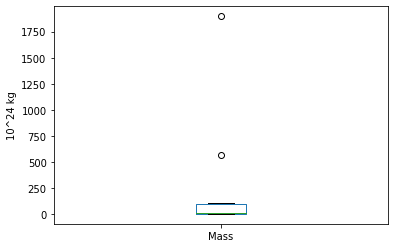

In [299]:
planets.Mass.plot(kind='box')
pp.ylabel('10^24 kg')

## DESCRIBE AND PLOT DISTRIBUTIONS

For this, we will import some more libraries and a richer dataset from <a href="https://www.gapminder.org">GapMinder</a> 


In [300]:
# Import Libraries
import numpy as np
import scipy.stats
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

import re
import mailbox
import csv

In [301]:
# Import data
gapminder = pd.read_csv('gapminder.csv')

In [302]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14740 entries, 0 to 14739
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           14740 non-null  object 
 1   year              14740 non-null  int64  
 2   region            14740 non-null  object 
 3   population        14740 non-null  float64
 4   life_expectancy   14740 non-null  float64
 5   age5_surviving    14740 non-null  float64
 6   babies_per_woman  14740 non-null  float64
 7   gdp_per_capita    14740 non-null  float64
 8   gdp_per_day       14740 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ MB


In [303]:
gapminder

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.00,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.00,604.0,1.653662
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.00,604.0,1.653662
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.00,625.0,1.711157
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.00,647.0,1.771389
...,...,...,...,...,...,...,...,...,...
14735,Zimbabwe,2011,Africa,14255592.0,51.60,90.800,3.64,1626.0,4.451745
14736,Zimbabwe,2012,Africa,14565482.0,54.20,91.330,3.56,1750.0,4.791239
14737,Zimbabwe,2013,Africa,14898092.0,55.70,91.670,3.49,1773.0,4.854209
14738,Zimbabwe,2014,Africa,15245855.0,57.00,91.900,3.41,1773.0,4.854209


### Scatter plots

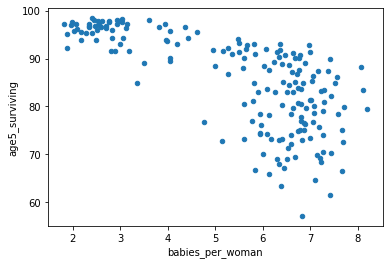

In [304]:
# Lets look at a scatter plot of a subset of the data
gapminder[gapminder.year == 1965].plot.scatter('babies_per_woman','age5_surviving')

In [307]:
#  Define a function to plot a scatter plot of a year
#  of data for babies_per_women to age5_surviving

def plotyear(year):
    data = gapminder[gapminder.year == year]
    area = 5e-6 * data.population
    colors = data.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})
    
    data.plot.scatter('babies_per_woman','age5_surviving',
                     s=area,c=colors,
                     linewidths=1,edgecolors='k',
                      figsize=(12,9))
    
    pp.axis(ymin=50,ymax=105,xmin=0,xmax=8)
    pp.xlabel('babies per woman')
    pp.ylabel('% children alive at 5')

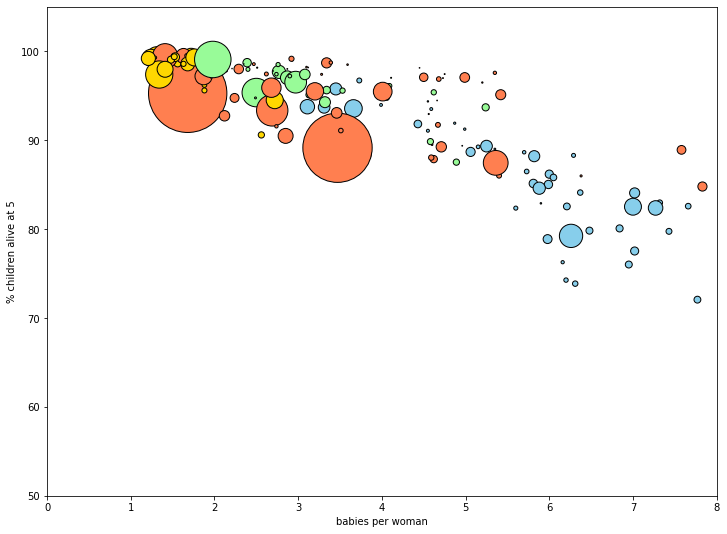

In [308]:
plotyear(1995)

In [309]:
# Add a very cool widget
interact(plotyear,year=widgets.IntSlider(min=1950,max=2015,step=1,value=1965))


interactive(children=(IntSlider(value=1965, description='year', max=2015, min=1950), Output()), _dom_classes=(…

<function __main__.plotyear(year)>

### Histogram

Let's look at the distribution of global life expectancies in a certain year.

In [310]:
gapminder.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,1.653662
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0,1.653662
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0,1.711157
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0,1.771389


In [311]:
data = gapminder[gapminder.year==2015]

In [312]:
data.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
80,Afghanistan,2015,Asia,32526562.0,53.8,90.89,4.47,1925.0,5.270363
161,Albania,2015,Europe,2896679.0,78.0,98.60,1.78,10620.0,29.075975
242,Algeria,2015,Africa,39666519.0,76.4,97.60,2.71,13434.0,36.780287
323,Angola,2015,Africa,25021974.0,59.6,84.31,5.65,7615.0,20.848734
404,Antigua and Barbuda,2015,America,91818.0,76.4,99.19,2.06,21049.0,57.629021


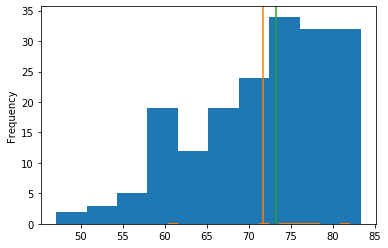

In [316]:
data.life_expectancy.plot(kind='hist')
# We can assign number of bins, and normalize
data.life_expectancy.plot(kind="hist",bins=30,density=True)

# We can add lines at the mean and median
pp.axvline(data.life_expectancy.mean(),c='C1')
pp.axvline(data.life_expectancy.median(),c='C2')

In [317]:
# We can also find the percentile of countries with < certain life expectancy
scipy.stats.percentileofscore(data.life_expectancy,75)

59.34065934065934

In [318]:
data = gapminder[gapminder.country=='United States']
data

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
14011,United States,1800,America,6801854.0,39.41,53.711,7.03,2128.0,5.826146
14012,United States,1810,America,8294928.0,39.41,53.904,6.81,2283.0,6.250513
14013,United States,1820,America,10361646.0,39.41,54.443,6.59,2242.0,6.138261
14014,United States,1830,America,13480460.0,39.41,55.406,6.38,2552.0,6.986995
14015,United States,1840,America,17942443.0,39.41,57.383,6.18,2792.0,7.644079
...,...,...,...,...,...,...,...,...,...
14087,United States,2011,America,312390368.0,78.90,99.280,1.90,49781.0,136.292950
14088,United States,2012,America,314799465.0,79.00,99.290,1.90,50549.0,138.395619
14089,United States,2013,America,317135919.0,79.10,99.310,1.98,51282.0,140.402464
14090,United States,2014,America,319448634.0,79.10,99.330,1.97,52118.0,142.691307


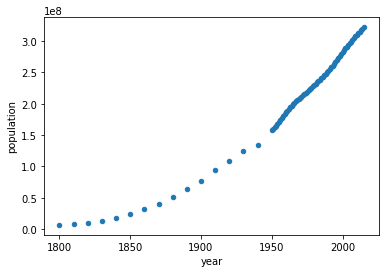

In [319]:
data.plot.scatter('year','population')

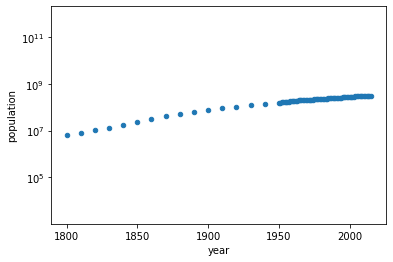

In [320]:
data.plot.scatter('year','population', logy=True)

In [323]:
# Let's get data for two countries to compare.
data = gapminder.query('(country == "Italy") or (country == "United States")')
data

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
6397,Italy,1800,Europe,18822234.0,29.69,54.259,5.47,2225.0,6.091718
6398,Italy,1810,Europe,19491674.0,29.69,54.395,5.47,2371.0,6.491444
6399,Italy,1820,Europe,20341608.0,29.69,54.531,5.47,2474.0,6.773443
6400,Italy,1830,Europe,21529667.0,29.69,54.667,5.47,2471.0,6.765229
6401,Italy,1840,Europe,22956667.0,29.69,54.804,5.47,2524.0,6.910335
...,...,...,...,...,...,...,...,...,...
14087,United States,2011,America,312390368.0,78.90,99.280,1.90,49781.0,136.292950
14088,United States,2012,America,314799465.0,79.00,99.290,1.90,50549.0,138.395619
14089,United States,2013,America,317135919.0,79.10,99.310,1.98,51282.0,140.402464
14090,United States,2014,America,319448634.0,79.10,99.330,1.97,52118.0,142.691307


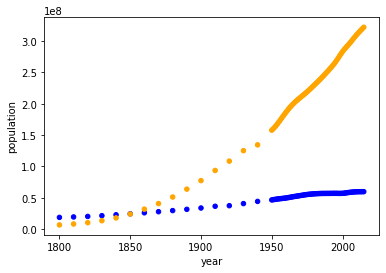

In [324]:
color = np.where(data.country=='Italy','blue','orange')
data.plot.scatter("year","population",c=color)

## Fitting Models to Data

We have described the sample of a population with statistics.
Now lets understand what we can say about a population from a sample of data.

In [325]:
# Import libraries
import math

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [326]:
# Get data subset
gdata = gapminder.query('year == 1985')

In [328]:
size = 1e-6 * gdata.population

colors = gdata.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})

def plotdata():
    gdata.plot.scatter('age5_surviving','babies_per_woman',
                       c=colors,s=size,linewidths=0.5,edgecolor='k',alpha=0.5)

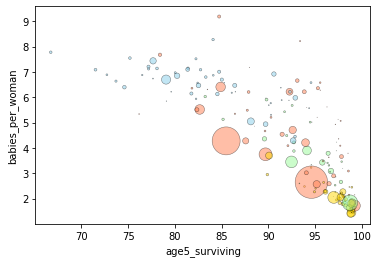

In [329]:
plotdata()

**statsmodels** has many capabilities.

Here we will use Ordinary Least Squares (OLS).
Least squares means models are fit by minimizing the squared difference between predictions and observations.

statsmodels lets us specify models using the "tilda" notation (also used in R)
response variable ~ model terms.  

For example: babes_per_woman ~ age5surviving

In [330]:
# Ordinary least squares model
model = smf.ols(formula='babies_per_woman ~ 1',data=gdata)
#    where babies per woman is the response variable and
#    1 represents a constant

In [331]:
# Next, we fit the model
grandmean = model.fit()

In [332]:
# Interrogate the model
grandmean

In [333]:
# Let's make a function to plot the data against the model prediction
def plotfit(fit):
    plotdata()
    pp.scatter(gdata.age5_surviving, fit.predict(gdata),
              c=colors,s=30,linewidths=0.5,edgecolor='k',marker='D')

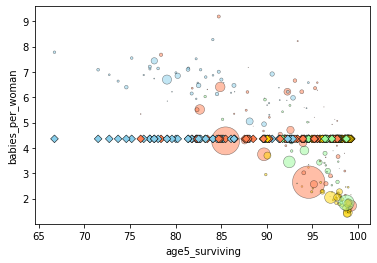

In [334]:
plotfit(grandmean)

In [335]:
grandmean.params

Intercept    4.360714
dtype: float64

In [336]:
groupmeans = smf.ols(formula='babies_per_woman ~ -1 + region',data=gdata).fit()

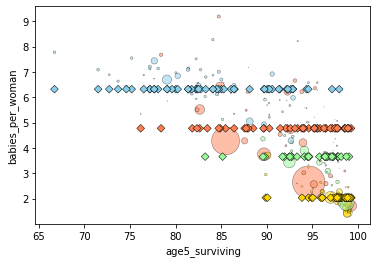

In [337]:
plotfit(groupmeans)

In [338]:
surviving = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving',data=gdata).fit()

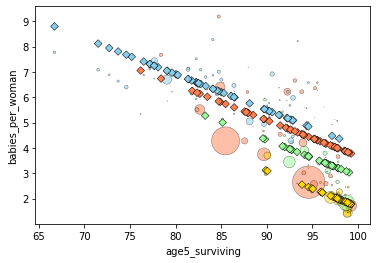

In [339]:
plotfit(surviving)

**statsmodels** provides a summary for the fit with Goodness of Fit statistics, and also provides an anova table for the significance of the added variables.

In [340]:
surviving.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       babies_per_woman   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     150.3
Date:                Thu, 16 Apr 2020   Prob (F-statistic):           8.26e-56
Time:                        14:54:06   Log-Likelihood:                -250.30
No. Observations:                 182   AIC:                             510.6
Df Residuals:                     177   BIC:                             526.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
region[Africa]     18.2658      1.168     15.639      0.000      15.961      20.571
region[America]    17.0859      1.315     12.990      0.000      14.490      19.682
region[Asia]       17.8647      1.279     13.971      0.000      15.341      20.388
region[Europe]     15.8722      1.352     11.739      0.000      13.204      18.541
age5_surviving     -0.1419      0.014    -10.294      0.000      -0.169      -0.115
==============================================================================
Omnibus:                       13.021   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.362
Skew:                           0.443   Prob(JB):                     0.000103
Kurtosis:                       4.279   Cond. No.                     3.25e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [341]:
sm.stats.anova_lm(surviving)

,df,sum_sq,mean_sq,F,PR(>F)
region,4.0,3927.702839,981.925710,1042.049316,8.236854e-122
age5_surviving,1.0,99.847912,99.847912,105.961630,9.003514e-20
Residual,177.0,166.787548,0.942303,NaN,NaN
